In [36]:
# Load csv file.
import csv
plateReaderFilePath = '/home/jiongyi/Documents/dna_damage/pyrene_assays/2018_09_17_pyrene_2_uM_actin_me_50_nM_arp23_500_nM_wave_pm_1_uM_dna.csv'
with open(plateReaderFilePath, 'r') as csvFile:
    reader = csv.DictReader(csvFile)
    importDict = {}
    for name in reader.fieldnames:
        importDict.update({name: []})
    for row in reader:
        for key in importDict.keys():
            try:
                importDict[key].append(float(row[key]))
            except:
                importDict[key].append(row[key])

/home/jiongyi/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


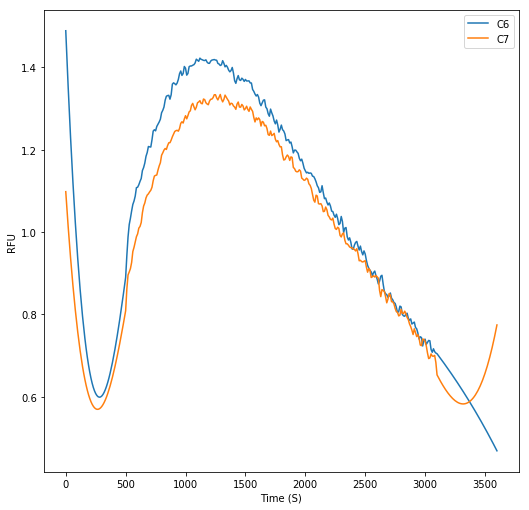

In [57]:
from numpy import array, arange, max, min, gradient
from scipy.signal import savgol_filter
from matplotlib.pyplot import subplots, xlabel, ylabel, legend
timeArr = arange(0, 3610, 10)
fieldNamesList = reader.fieldnames
figObj, axObj = subplots()
figObj.set_figheight(8.5)
figObj.set_figwidth(8.5)
for i in range(1, len(fieldNamesList)):
    rfuArr = array(importDict[fieldNamesList[i]])
    rfuArr -= min(rfuArr)
    axObj.plot(timeArr, savgol_filter(gradient(rfuArr) / gradient(timeArr), 101, 3))
axObj.set_xlabel('Time (S)')
axObj.set_ylabel('RFU')
axObj.legend(fieldNamesList[1:])

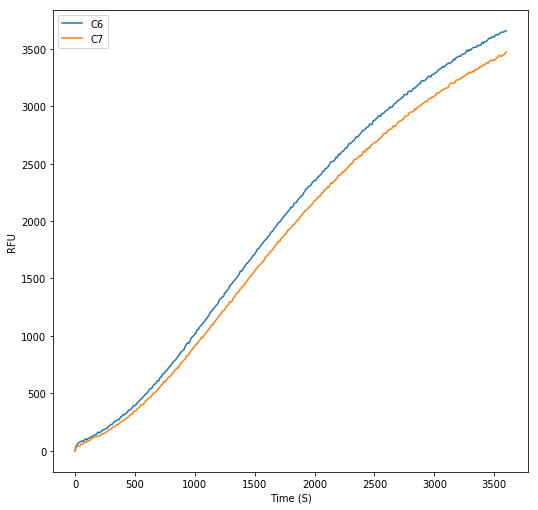

In [58]:
figObj, axObj = subplots()
figObj.set_figheight(8.5)
figObj.set_figwidth(8.5)
for i in range(1, len(fieldNamesList)):
    rfuArr = array(importDict[fieldNamesList[i]])
    rfuArr -= min(rfuArr)
    axObj.plot(timeArr, rfuArr)
axObj.set_xlabel('Time (S)')
axObj.set_ylabel('RFU')
axObj.legend(fieldNamesList[1:])